In [4]:
import numpy as np
import uproot
import ROOT as rt
import matplotlib.pyplot as plt
import mplhep as hep

## config params

In [6]:
qr_run_n, qr_model_str, tag, train_share = 7, 'dense_20pct_train_env', 'PDinj_NA3p5_r7env', 0.2
#qr_run_n, qr_model_str, train_share = 8, 'dense_70pct_train', 0.7
#qr_run_n, qr_model_str, train_share = 9, 'dense_50pct_train', 0.5

# Set binning
useDijet = True

In [7]:
# binning
if useDijet:
    bin_edges = np.array([1200, 1255, 1320, 1387, 1457, 1529,
                          1604, 1681, 1761, 1844, 1930, 2019, 
                          2111, 2206, 2305, 2406, 2512, 2620, 
                          2733, 2849, 2969, 3093, 3221, 3353,
                          3490, 3632, 3778, 3928, 4084, 4245, 
                          4411, 4583, 4760, 4943, 5132, 5327]).astype('float')
# Constant binwidth
else:
    bin_edges = np.array(np.arange(1200.,5500., 100.).tolist()).astype('float') #100 GeV binning. Stop at 5600! Fit fails if going to 6800


n_bins = len(bin_edges)-1

## read and print combine results

In [9]:
# read fit results!!

xsecs_sig = [0,20,40,60,80,100]
sig_inj_vals = [x//10 for x in xsecs_sig]
quantiles = [0.7, 0.5, 0.3, 0.1]
tmplt_q = 'q07_q1'

gof_exp_quants = {}
gof_obs_quants = {}

for quant in quantiles:
    
    gof_exp_xsecs = []
    gof_obs_xsecs =[]
    
    for xs in xsecs_sig:
        
        q_str = int(quant*100)
        prefix = "q{}_xs{}_{}".format(q_str,xs,tag)

        # read values for observed events
        gof_obs_file = uproot.open('higgsCombineRatio_gof_{PREFIX}.GoodnessOfFit.mH120.root'.format(PREFIX=prefix))
        gof_obs = gof_obs_file['limit'].arrays('limit')[b'limit'][0] # changing key to byte-string python2 style encoding!!
        gof_obs_xsecs.append(gof_obs)
        
        # read values for expected events
        gof_exp_file = uproot.open('higgsCombineRatio_gof_toys_{PREFIX}.GoodnessOfFit.mH120.ALLTOYS.root'.format(PREFIX=prefix))
        gof_exp = gof_exp_file['limit'].arrays('limit')[b'limit']
        gof_exp_xsecs.append(gof_exp)
        
    gof_obs_quants[quant] = gof_obs_xsecs    
    gof_exp_quants[quant] = gof_exp_xsecs

In [10]:
q_str = int(quant*100)
prefix = "q{}_xs{}_{}".format(q_str,xs,tag)
ff = uproot.open('higgsCombineRatio_gof_{PREFIX}.GoodnessOfFit.mH120.root'.format(PREFIX=prefix))
obs = ff['limit'].arrays('limit')[b'limit'][0]

In [11]:
# compute pvalues
n_total = len(xsecs_sig)

pvals_obs_quants = {}
pvals_toys_quants = {}

for quant in quantiles:
    
    print('\nquantile ' + str(quant))
    
    gof_exp_quant = gof_exp_quants[quant]
    gof_obs_quant = gof_obs_quants[quant]
    
    pvals_obs_xsecs = []
    pvals_toys_xsecs = []

    for xs, gof_exp, gof_obs in zip(xsecs_sig, gof_exp_quant, gof_obs_quant):
        print("xsec={}:".format(xs) )
           
       # get p-value from toys
        n_extreme = len(gof_exp[gof_exp > gof_obs])
        pval_toys = 1.*n_extreme/n_total
        pvals_toys_xsecs.append(pval_toys)
        # get p-value assuming chi2 dist (may not be valid)
        pval = rt.TMath.Prob(gof_obs,n_bins)
        pvals_obs_xsecs.append(pval)
        
        print("Obs  = {:.1f}".format(gof_obs))
        print("Exp  = {:.1f}".format(np.mean(gof_exp)))
        print("pval = {:.2f}".format(pval_toys))

    pvals_obs_quants[quant] = pvals_obs_xsecs    
    pvals_toys_quants[quant] = pvals_toys_xsecs


quantile 0.7
xsec=0:
Obs  = 38.5
Exp  = 35.3
pval = 10.83
xsec=20:
Obs  = 38.0
Exp  = 35.5
pval = 13.00
xsec=40:
Obs  = 39.1
Exp  = 35.7
pval = 11.67
xsec=60:
Obs  = 38.5
Exp  = 35.3
pval = 11.50
xsec=80:
Obs  = 38.1
Exp  = 35.2
pval = 12.33
xsec=100:
Obs  = 37.5
Exp  = 36.0
pval = 13.67

quantile 0.5
xsec=0:
Obs  = 26.7
Exp  = 34.8
pval = 28.50
xsec=20:
Obs  = 26.1
Exp  = 34.7
pval = 28.00
xsec=40:
Obs  = 27.3
Exp  = 35.4
pval = 28.33
xsec=60:
Obs  = 27.5
Exp  = 33.9
pval = 26.00
xsec=80:
Obs  = 28.5
Exp  = 36.0
pval = 26.83
xsec=100:
Obs  = 27.1
Exp  = 34.8
pval = 28.33

quantile 0.3
xsec=0:
Obs  = 35.3
Exp  = 35.6
pval = 16.00
xsec=20:
Obs  = 32.8
Exp  = 35.2
pval = 19.33
xsec=40:
Obs  = 31.4
Exp  = 35.2
pval = 21.67
xsec=60:
Obs  = 30.2
Exp  = 35.2
pval = 24.67
xsec=80:
Obs  = 29.9
Exp  = 34.7
pval = 24.00
xsec=100:
Obs  = 29.5
Exp  = 35.5
pval = 25.83

quantile 0.1
xsec=0:
Obs  = 33.0
Exp  = 35.9
pval = 21.17
xsec=20:
Obs  = 32.6
Exp  = 34.0
pval = 17.00
xsec=40:
Obs  = 33.0
Exp 

## make xsec-injection vs p-value plot

[10.833 13.    11.667 11.5   12.333 13.667]
[28.5   28.    28.333 26.    26.833 28.333]
[16.    19.333 21.667 24.667 24.    25.833]
[21.167 17.    17.167 19.167 13.667 10.333]


Text(0.5, 1.0, 'dense_20pct_train_env model, 0.7-1.0 template quantile')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


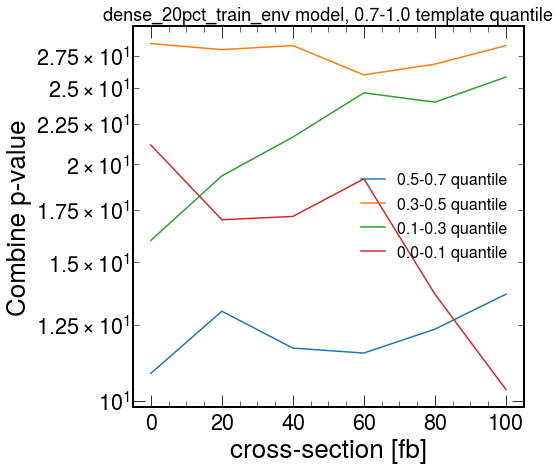

In [12]:
import matplotlib as mpl
np.set_printoptions(precision=3, suppress=False)
q_strs = [str(quant) for quant in quantiles]
template_q_idx = 0

fig = plt.figure(figsize=(7, 7)) # figsize=(5, 5)
# Load CMS style sheet
plt.style.use(hep.style.CMS)
# define color palett for pvalue plotting
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                    '#bcbd22', '#17becf']    


for quant, c in zip(quantiles, palette):
    
    dat = pvals_toys_quants[quant]
        
    label = '{}-{} quantile'.format((q_strs+['0.0'])[quantiles.index(quant)+1], (q_strs+['0.0'])[quantiles.index(quant)])
    plt.semilogy(xsecs_sig, dat, color=c, label=label)
    
    print(np.asarray(dat))
    
plt.legend(loc='best', fontsize=16)
plt.xlabel('cross-section [fb]')
plt.ylabel('Combine p-value')
#plt.ylim(bottom=1e-12, top=1)
#plt.xlim(left=0)

# set yticks manually
#plt.gca().tick_params(direction='in', which='both')
#plt.gca().minorticks_on()
#locmaj = mpl.ticker.LogLocator(base=10, numticks=15) 
#plt.gca().yaxis.set_major_locator(locmaj)
#locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2,0.4,0.6,0.8), numticks=15)
#plt.gca().yaxis.set_minor_locator(locmin)
#plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.title('{} model, {}-{} template quantile'.format(qr_model_str,q_strs[template_q_idx],'1.0'), fontsize=18)